<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) | [Contents](Index.ipynb) | [Visualizing Errors](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import pandas as pd

import seaborn as sns

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

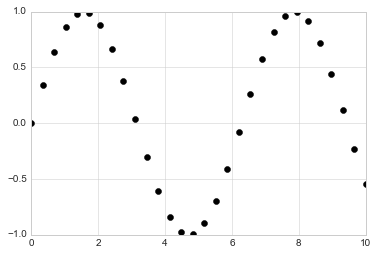

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

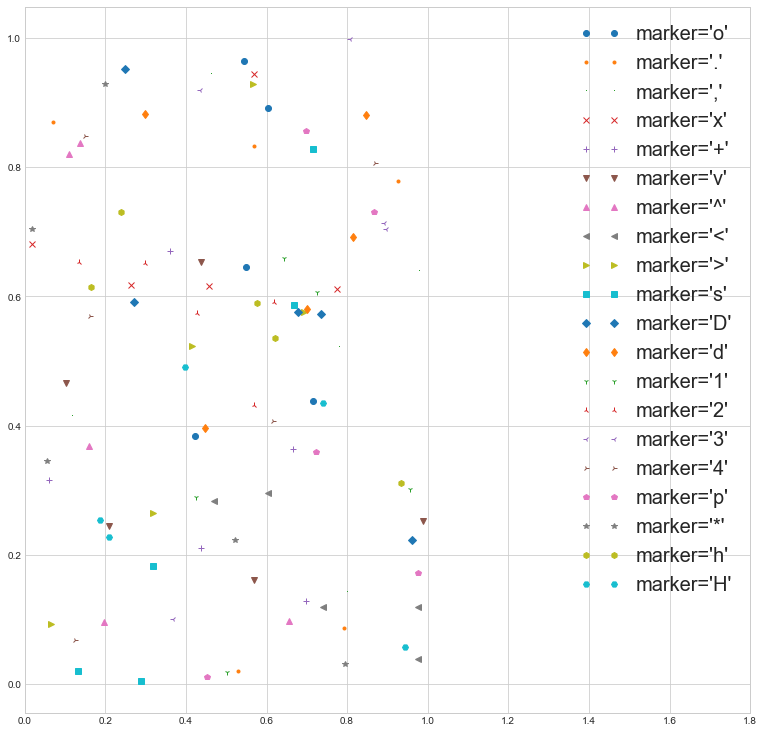

In [18]:
plt.figure(figsize=(13, 13))

rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'D', 'd', '1', '2', '3', '4', 'p', '*', 'h', 'H']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=2, fontsize=20)
plt.xlim(0, 1.8);

In [11]:
?plt.legend

```
Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will result in
no legend being drawn.


**2. Labeling existing plot elements**

To make a legend for lines which already exist on the axes
(via plot for instance), simply call this function with an iterable
of strings, one for each legend item. For example::

    ax.plot([1, 2, 3])
    ax.legend(['A simple line'])

Note: This way of using is discouraged, because the relation between
plot elements and labels is only implicit by their order and can
easily be mixed up.


**3. Explicitly defining the elements in the legend**

For full control of which artists have a legend entry, it is possible
to pass an iterable of legend artists followed by an iterable of
legend labels respectively::

    legend((line1, line2, line3), ('label1', 'label2', 'label3'))

Parameters
----------
handles : sequence of `.Artist`, optional
    A list of Artists (lines, patches) to be added to the legend.
    Use this together with *labels*, if you need full control on what
    is shown in the legend and the automatic mechanism described above
    is not sufficient.

    The length of handles and labels should be the same in this
    case. If they are not, they are truncated to the smaller length.

labels : list of str, optional
    A list of labels to show next to the artists.
    Use this together with *handles*, if you need full control on what
    is shown in the legend and the automatic mechanism described above
    is not sufficient.

Other Parameters
----------------

loc : str or pair of floats, default: :rc:`legend.loc` ('best' for axes, 'upper right' for figures)
    The location of the legend.

    The strings
    ``'upper left', 'upper right', 'lower left', 'lower right'``
    place the legend at the corresponding corner of the axes/figure.

    The strings
    ``'upper center', 'lower center', 'center left', 'center right'``
    place the legend at the center of the corresponding edge of the
    axes/figure.

    The string ``'center'`` places the legend at the center of the axes/figure.

    The string ``'best'`` places the legend at the location, among the nine
    locations defined so far, with the minimum overlap with other drawn
    artists.  This option can be quite slow for plots with large amounts of
    data; your plotting speed may benefit from providing a specific location.

    The location can also be a 2-tuple giving the coordinates of the lower-left
    corner of the legend in axes coordinates (in which case *bbox_to_anchor*
    will be ignored).

    For back-compatibility, ``'center right'`` (but no other location) can also
    be spelled ``'right'``, and each "string" locations can also be given as a
    numeric value:

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============

bbox_to_anchor : `.BboxBase`, 2-tuple, or 4-tuple of floats
    Box that is used to position the legend in conjunction with *loc*.
    Defaults to `axes.bbox` (if called as a method to `.Axes.legend`) or
    `figure.bbox` (if `.Figure.legend`).  This argument allows arbitrary
    placement of the legend.

    Bbox coordinates are interpreted in the coordinate system given by
    `bbox_transform`, with the default transform
    Axes or Figure coordinates, depending on which ``legend`` is called.

    If a 4-tuple or `.BboxBase` is given, then it specifies the bbox
    ``(x, y, width, height)`` that the legend is placed in.
    To put the legend in the best location in the bottom right
    quadrant of the axes (or figure)::

        loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5)

    A 2-tuple ``(x, y)`` places the corner of the legend specified by *loc* at
    x, y.  For example, to put the legend's upper right-hand corner in the
    center of the axes (or figure) the following keywords can be used::

        loc='upper right', bbox_to_anchor=(0.5, 0.5)

ncol : integer
    The number of columns that the legend has. Default is 1.

prop : None or :class:`matplotlib.font_manager.FontProperties` or dict
    The font properties of the legend. If None (default), the current
    :data:`matplotlib.rcParams` will be used.

fontsize : int or float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    The font size of the legend. If the value is numeric the size will be the
    absolute font size in points. String values are relative to the current
    default font size. This argument is only used if *prop* is not specified.

numpoints : None or int
    The number of marker points in the legend when creating a legend
    entry for a `.Line2D` (line).
    Default is ``None``, which means using :rc:`legend.numpoints`.

scatterpoints : None or int
    The number of marker points in the legend when creating
    a legend entry for a `.PathCollection` (scatter plot).
    Default is ``None``, which means using :rc:`legend.scatterpoints`.

scatteryoffsets : iterable of floats
    The vertical offset (relative to the font size) for the markers
    created for a scatter plot legend entry. 0.0 is at the base the
    legend text, and 1.0 is at the top. To draw all markers at the
    same height, set to ``[0.5]``. Default is ``[0.375, 0.5, 0.3125]``.

markerscale : None or int or float
    The relative size of legend markers compared with the originally
    drawn ones.
    Default is ``None``, which means using :rc:`legend.markerscale`.

markerfirst : bool
    If *True*, legend marker is placed to the left of the legend label.
    If *False*, legend marker is placed to the right of the legend
    label.
    Default is *True*.

frameon : None or bool
    Whether the legend should be drawn on a patch (frame).
    Default is ``None``, which means using :rc:`legend.frameon`.

fancybox : None or bool
    Whether round edges should be enabled around the `~.FancyBboxPatch` which
    makes up the legend's background.
    Default is ``None``, which means using :rc:`legend.fancybox`.

shadow : None or bool
    Whether to draw a shadow behind the legend.
    Default is ``None``, which means using :rc:`legend.shadow`.

framealpha : None or float
    The alpha transparency of the legend's background.
    Default is ``None``, which means using :rc:`legend.framealpha`.
    If *shadow* is activated and *framealpha* is ``None``, the default value is
    ignored.

facecolor : None or "inherit" or color
    The legend's background color.
    Default is ``None``, which means using :rc:`legend.facecolor`.
    If ``"inherit"``, use :rc:`axes.facecolor`.

edgecolor : None or "inherit" or color
    The legend's background patch edge color.
    Default is ``None``, which means using :rc:`legend.edgecolor`.
    If ``"inherit"``, use take :rc:`axes.edgecolor`.

mode : {"expand", None}
    If *mode* is set to ``"expand"`` the legend will be horizontally
    expanded to fill the axes area (or `bbox_to_anchor` if defines
    the legend's size).

bbox_transform : None or :class:`matplotlib.transforms.Transform`
    The transform for the bounding box (`bbox_to_anchor`). For a value
    of ``None`` (default) the Axes'
    :data:`~matplotlib.axes.Axes.transAxes` transform will be used.

title : str or None
    The legend's title. Default is no title (``None``).

title_fontsize: str or None
    The fontsize of the legend's title.  Default is the default fontsize.

borderpad : float or None
    The fractional whitespace inside the legend border, in font-size units.
    Default is ``None``, which means using :rc:`legend.borderpad`.

labelspacing : float or None
    The vertical space between the legend entries, in font-size units.
    Default is ``None``, which means using :rc:`legend.labelspacing`.

handlelength : float or None
    The length of the legend handles, in font-size units.
    Default is ``None``, which means using :rc:`legend.handlelength`.

handletextpad : float or None
    The pad between the legend handle and text, in font-size units.
    Default is ``None``, which means using :rc:`legend.handletextpad`.

borderaxespad : float or None
    The pad between the axes and legend border, in font-size units.
    Default is ``None``, which means using :rc:`legend.borderaxespad`.

columnspacing : float or None
    The spacing between columns, in font-size units.
    Default is ``None``, which means using :rc:`legend.columnspacing`.

handler_map : dict or None
    The custom dictionary mapping instances or types to a legend
    handler. This `handler_map` updates the default handler map
    found at :func:`matplotlib.legend.Legend.get_legend_handler_map`.



Returns
-------
legend : `~matplotlib.legend.Legend`

Notes
-----
Not all kinds of artist are supported by the legend command. See
:doc:`/tutorials/intermediate/legend_guide` for details.

Examples
--------
.. plot:: gallery/text_labels_and_annotations/legend.py
File:      c:\users\dhjan\anaconda3\lib\site-packages\matplotlib\pyplot.py
Type:      function
```

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

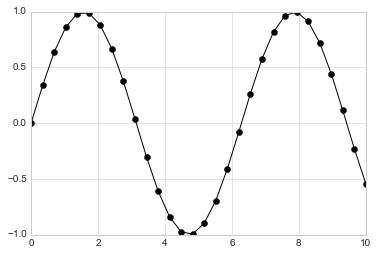

In [4]:
plt.plot(x, y, '-ok'); # 선 (-), 원표시 기호 (o), 검정색 (k)

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

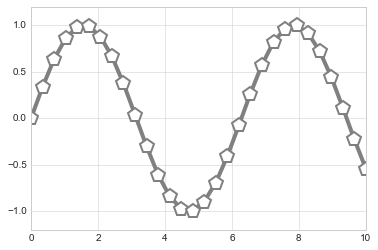

In [5]:
plt.plot(x, y, '-p', color='gray',                  # 선 (-), 오각형 표시 기호 (p)
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

In [8]:
?plt.plot

```
Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)

When conflicting with *fmt*, keyword arguments take precedence.


**Plotting labelled data**

There's a convenient way for plotting objects with labelled data (i.e.
data that can be accessed by index ``obj['y']``). Instead of giving
the data in *x* and *y*, you can provide the object in the *data*
parameter and just give the labels for *x* and *y*::

>>> plot('xlabel', 'ylabel', data=obj)

All indexable objects are supported. This could e.g. be a `dict`, a
`pandas.DataFame` or a structured numpy array.


**Plotting multiple sets of data**

There are various ways to plot multiple sets of data.

- The most straight forward way is just to call `plot` multiple times.
  Example:

  >>> plot(x1, y1, 'bo')
  >>> plot(x2, y2, 'go')

- Alternatively, if your data is already a 2d array, you can pass it
  directly to *x*, *y*. A separate data set will be drawn for every
  column.

  Example: an array ``a`` where the first column represents the *x*
  values and the other columns are the *y* columns::

  >>> plot(a[0], a[1:])

- The third way is to specify multiple sets of *[x]*, *y*, *[fmt]*
  groups::

  >>> plot(x1, y1, 'g^', x2, y2, 'g-')

  In this case, any additional keyword argument applies to all
  datasets. Also this syntax cannot be combined with the *data*
  parameter.

By default, each line is assigned a different style specified by a
'style cycle'. The *fmt* and line property parameters are only
necessary if you want explicit deviations from these defaults.
Alternatively, you can also change the style cycle using
:rc:`axes.prop_cycle`.


Parameters
----------
x, y : array-like or scalar
    The horizontal / vertical coordinates of the data points.
    *x* values are optional and default to `range(len(y))`.

    Commonly, these parameters are 1D arrays.

    They can also be scalars, or two-dimensional (in that case, the
    columns represent separate data sets).

    These arguments cannot be passed as keywords.

fmt : str, optional
    A format string, e.g. 'ro' for red circles. See the *Notes*
    section for a full description of the format strings.

    Format strings are just an abbreviation for quickly setting
    basic line properties. All of these and more can also be
    controlled by keyword arguments.

    This argument cannot be passed as keyword.

data : indexable object, optional
    An object with labelled data. If given, provide the label names to
    plot in *x* and *y*.

    .. note::
        Technically there's a slight ambiguity in calls where the
        second label is a valid *fmt*. `plot('n', 'o', data=obj)`
        could be `plt(x, y)` or `plt(y, fmt)`. In such cases,
        the former interpretation is chosen, but a warning is issued.
        You may suppress the warning by adding an empty format string
        `plot('n', 'o', '', data=obj)`.

Other Parameters
----------------
scalex, scaley : bool, optional, default: True
    These parameters determined if the view limits are adapted to
    the data limits. The values are passed on to `autoscale_view`.

**kwargs : `.Line2D` properties, optional
    *kwargs* are used to specify properties like a line label (for
    auto legends), linewidth, antialiasing, marker face color.
    Example::

    >>> plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=2)
    >>> plot([1, 2, 3], [1, 4, 9], 'rs', label='line 2')

    If you make multiple lines with one plot command, the kwargs
    apply to all those lines.

    Here is a list of available `.Line2D` properties:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: float or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: color
    contains: callable
    dash_capstyle: {'butt', 'round', 'projecting'}
    dash_joinstyle: {'miter', 'round', 'bevel'}
    dashes: sequence of floats (on/off ink in points) or (None, None)
    data: (2, N) array or two 1D arrays
    drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
    figure: `.Figure`
    fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
    gid: str
    in_layout: bool
    label: object
    linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    linewidth or lw: float
    marker: marker style
    markeredgecolor or mec: color
    markeredgewidth or mew: float
    markerfacecolor or mfc: color
    markerfacecoloralt or mfcalt: color
    markersize or ms: float
    markevery: None or int or (int, int) or slice or List[int] or float or (float, float)
    path_effects: `.AbstractPathEffect`
    picker: float or callable[[Artist, Event], Tuple[bool, dict]]
    pickradius: float
    rasterized: bool or None
    sketch_params: (scale: float, length: float, randomness: float)
    snap: bool or None
    solid_capstyle: {'butt', 'round', 'projecting'}
    solid_joinstyle: {'miter', 'round', 'bevel'}
    transform: `matplotlib.transforms.Transform`
    url: str
    visible: bool
    xdata: 1D array
    ydata: 1D array
    zorder: float

Returns
-------
lines
    A list of `.Line2D` objects representing the plotted data.

See Also
--------
scatter : XY scatter plot with markers of varying size and/or color (
    sometimes also called bubble chart).

Notes
-----
**Format Strings**

A format string consists of a part for color, marker and line::

    fmt = '[marker][line][color]'

Each of them is optional. If not provided, the value from the style
cycle is used. Exception: If ``line`` is given, but no ``marker``,
the data will be a line without markers.

Other combinations such as ``[color][marker][line]`` are also
supported, but note that their parsing may be ambiguous.

**Markers**

=============    ===============================
character        description
=============    ===============================
``'.'``          point marker
``','``          pixel marker
``'o'``          circle marker
``'v'``          triangle_down marker
``'^'``          triangle_up marker
``'<'``          triangle_left marker
``'>'``          triangle_right marker
``'1'``          tri_down marker
``'2'``          tri_up marker
``'3'``          tri_left marker
``'4'``          tri_right marker
``'s'``          square marker
``'p'``          pentagon marker
``'*'``          star marker
``'h'``          hexagon1 marker
``'H'``          hexagon2 marker
``'+'``          plus marker
``'x'``          x marker
``'D'``          diamond marker
``'d'``          thin_diamond marker
``'|'``          vline marker
``'_'``          hline marker
=============    ===============================

**Line Styles**

=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    ===============================

Example format strings::

    'b'    # blue markers with default shape
    'or'   # red circles
    '-g'   # green solid line
    '--'   # dashed line with default color
    '^k:'  # black triangle_up markers connected by a dotted line

**Colors**

The supported color abbreviations are the single letter codes

=============    ===============================
character        color
=============    ===============================
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white
=============    ===============================

and the ``'CN'`` colors that index into the default property cycle.

If the color is the only part of the format string, you can
additionally use any  `matplotlib.colors` spec, e.g. full names
(``'green'``) or hex strings (``'#008000'``).
File:      c:\users\dhjan\anaconda3\lib\site-packages\matplotlib\pyplot.py
Type:      function
```

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

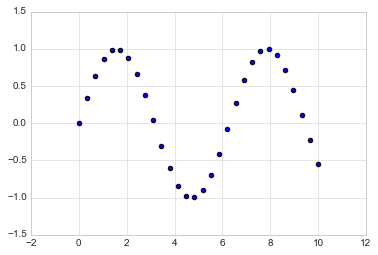

In [6]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

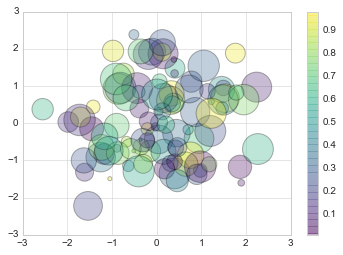

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')     # cmap : `~matplotlib.colors.Colormap`
plt.colorbar();  # show color scale

In [19]:
?plt.scatter

```
Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=<deprecated parameter>,
    edgecolors=None,
    *,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : scalar or array-like, shape (n, )
    The data positions.

s : scalar or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of colors, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of colors of length n.
    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to be
    colormapped. If you want to specify the same RGB or RGBA value for
    all points, use a 2-D array with a single row.  Otherwise, value-
    matching will have precedence in case of a size matching with *x*
    and *y*.

    Defaults to ``None``. In that case the marker color is determined
    by the value of ``color``, ``facecolor`` or ``facecolors``. In case
    those are not specified or ``None``, the marker color is determined
    by the next color of the ``Axes``' current "shape and fill" color
    cycle. This cycle defaults to :rc:`axes.prop_cycle`.

marker : `~matplotlib.markers.MarkerStyle`, optional
    The marker style. *marker* can be either an instance of the class
    or the text shorthand for a particular marker.
    Defaults to ``None``, in which case it takes the value of
    :rc:`scatter.marker` = 'o'.
    See `~matplotlib.markers` for more information about marker styles.

cmap : `~matplotlib.colors.Colormap`, optional, default: None
    A `.Colormap` instance or registered colormap name. *cmap* is only
    used if *c* is an array of floats. If ``None``, defaults to rc
    ``image.cmap``.

norm : `~matplotlib.colors.Normalize`, optional, default: None
    A `.Normalize` instance is used to scale luminance data to 0, 1.
    *norm* is only used if *c* is an array of floats. If *None*, use
    the default `.colors.Normalize`.

vmin, vmax : scalar, optional, default: None
    *vmin* and *vmax* are used in conjunction with *norm* to normalize
    luminance data. If None, the respective min and max of the color
    array is used. *vmin* and *vmax* are ignored if you pass a *norm*
    instance.

alpha : scalar, optional, default: None
    The alpha blending value, between 0 (transparent) and 1 (opaque).

linewidths : scalar or array-like, optional, default: None
    The linewidth of the marker edges. Note: The default *edgecolors*
    is 'face'. You may want to change this as well.
    If *None*, defaults to :rc:`lines.linewidth`.

edgecolors : {'face', 'none', *None*} or color or sequence of color, optional.
    The edge color of the marker. Possible values:

    - 'face': The edge color will always be the same as the face color.
    - 'none': No patch boundary will be drawn.
    - A Matplotlib color or sequence of color.

    Defaults to ``None``, in which case it takes the value of
    :rc:`scatter.edgecolors` = 'face'.

    For non-filled markers, the *edgecolors* kwarg is ignored and
    forced to 'face' internally.

plotnonfinite : boolean, optional, default: False
    Set to plot points with nonfinite *c*, in conjunction with
    `~matplotlib.colors.Colormap.set_bad`.

Returns
-------
paths : `~matplotlib.collections.PathCollection`

Other Parameters
----------------
**kwargs : `~matplotlib.collections.Collection` properties

See Also
--------
plot : To plot scatter plots when markers are identical in size and
    color.

Notes
-----
* The `.plot` function will be faster for scatterplots where markers
  don't vary in size or color.

* Any or all of *x*, *y*, *s*, and *c* may be masked arrays, in which
  case all masks will be combined and only unmasked points will be
  plotted.

* Fundamentally, scatter works with 1-D arrays; *x*, *y*, *s*, and *c*
  may be input as N-D arrays, but within scatter they will be
  flattened. The exception is *c*, which will be flattened only if its
  size matches the size of *x* and *y*.

.. note::
    In addition to the above described arguments, this function can take a
    **data** keyword argument. If such a **data** argument is given, the
    following arguments are replaced by **data[<arg>]**:

    * All arguments with the following names: 'c', 'color', 'edgecolors', 'facecolor', 'facecolors', 'linewidths', 's', 'x', 'y'.

    Objects passed as **data** must support item access (``data[<arg>]``) and
    membership test (``<arg> in data``).
File:      c:\users\dhjan\anaconda3\lib\site-packages\matplotlib\pyplot.py
Type:      function
```

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

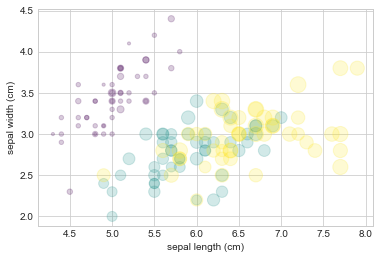

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

In [2]:
# loading 'iris' dataset from seaborn
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

* matplotlib 으로 그룹별 산점도 그리기 (scatter plot by groups via matplotlib)

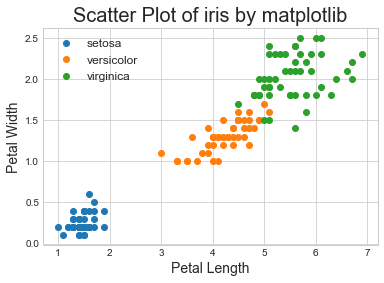

In [5]:
# Scatter plot with a different color by groups
groups = iris.groupby('species')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.petal_length, 
            group.petal_width, 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

* seaborn 으로 그룹별 산점도 그리기 (scatter plot by groups via seaborn)

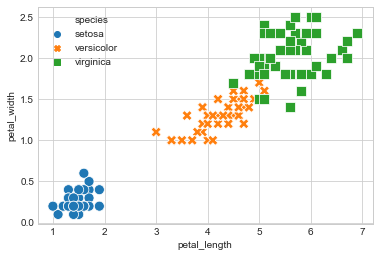

In [6]:
# Scatter plot by Groups
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()

* pandas로 그룹별 산점도 그리기 (scatter plot by groups via pandas)

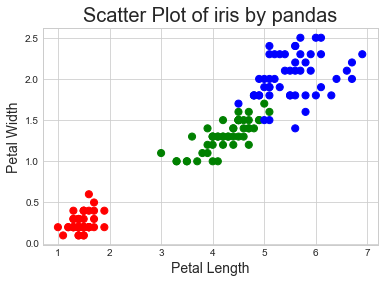

In [7]:
# adding 'color' column
iris['color'] = np.where(iris.species == 'setosa', 'red', 
                         np.where(iris.species =='versicolor', 
                         'green', 
                         'blue'))
# scatter plot
iris.plot(kind='scatter',
          x='petal_length', 
          y='petal_width', 
          s=50, # marker size
          c=iris['color']) # marker color by group
plt.title('Scatter Plot of iris by pandas', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

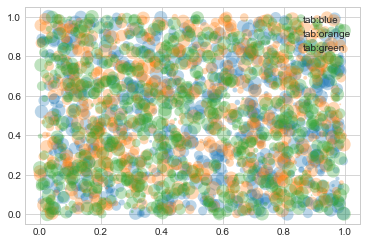

In [14]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')
    
ax.legend()
ax.grid(True)

plt.show()

## Scatter Charts in Matplotlib

We start by importing matplotlib and display all visuals inline, using the ggplot style sheet.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

Scatter plots take 2 equal length arrays as input

[]

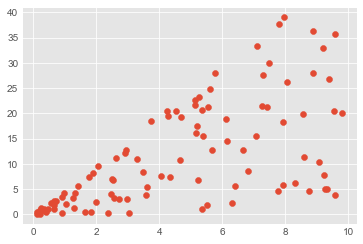

In [16]:
import numpy as np

x = np.random.rand(100) * 10
y = x * np.random.rand(100) * 5
plt.scatter(x, y)
plt.plot()

### Plotting multiple x’s

If we had multiple series we wanted to plot on the same axes, we can pass them all to `plt.scatter()` before calling `plt.show()`.

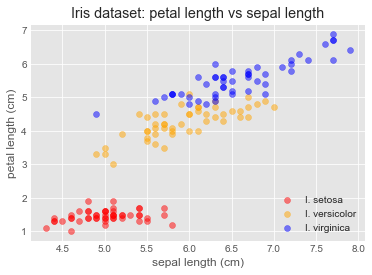

In [17]:
from sklearn import datasets
import pandas as pd

# Load some data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

colours = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')

plt.show()

## Plot 2D views of the iris dataset

Plot a simple scatter plot of 2 features of the iris dataset.

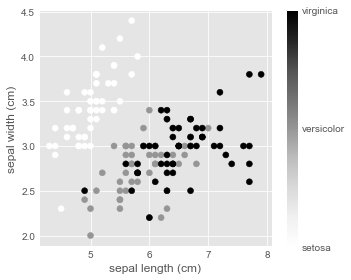

In [18]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()
from matplotlib import pyplot as plt
# The indices of the features that we are plotting
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

##  tSNE to visualize digits

Here we use sklearn.manifold.TSNE to visualize the digits datasets. Indeed, the digits are vectors in a $8 \times 8 = 64$ dimensional space. We want to project them in 2D for visualization. tSNE is often a good solution, as it groups and separates data points based on their local relationship.

Load the iris data.

406p 응용: 손으로 쓴 숫자 탐색    비지도학습: 차원 축소

487p 예제: 포레스트를 사용한 숫자 분류

In [19]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

Fit and transform with a TSNE.

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

Project the data in 2D.

In [21]:
X_2d = tsne.fit_transform(X)

Visualize the data.

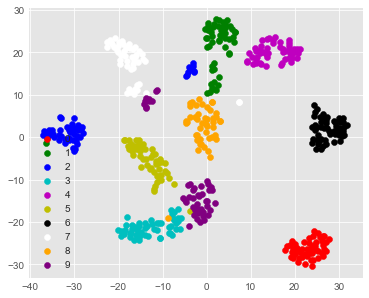

In [22]:
target_ids = range(len(digits.target_names))
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

<!--NAVIGATION-->
< [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) | [Contents](Index.ipynb) | [Visualizing Errors](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
